## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Load and Read the Dataset

In [2]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1293,1294,60,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2006,WD,Normal,162900
1197,1198,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal,144000
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
1092,1093,50,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,136500
256,257,60,FV,64.0,8791,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,207500


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [8]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

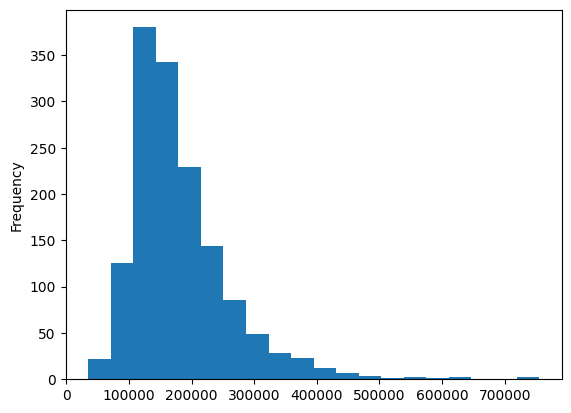

In [9]:
df_train['SalePrice'].plot.hist(bins=20)

## Check for Missing Values

In [10]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


#### We filled the feature with missing data with 'None' due to the high amount of missing values.

In [11]:
df_train['PoolQC'].fillna('None', inplace=True)
df_train['Fence'].fillna('None', inplace=True)
df_train['MiscFeature'].fillna('None', inplace=True)
df_train['Alley'].fillna('None', inplace=True)
df_train['MasVnrType'].fillna('None', inplace=True)
df_train['FireplaceQu'].fillna('Unknown', inplace=True)

In [12]:
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for feature in garage_features:
    df_train[feature].fillna('None', inplace=True)
df_train['GarageYrBlt'].fillna(0, inplace=True)

In [13]:
bsmt_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for feature in bsmt_features:
    df_train[feature].fillna('None', inplace=True)

In [14]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(), inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace=True)

In [15]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)

In [16]:
# Check for any remaining missing values
missing_values_test = df_train.isnull().sum()
print(missing_values_test[missing_values_test > 0])

Series([], dtype: int64)


In [17]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Separation of Categorical and Numerical Variables

In [19]:
df_train.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,1460,3,None,1369
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [20]:
categorical_vars = df_train.select_dtypes(include=['object']).columns
numerical_vars = df_train.select_dtypes(include=['int64', 'float64']).columns

In [21]:
df_train = pd.get_dummies(df_train, columns=categorical_vars, drop_first=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 261 entries, Id to SaleCondition_Partial
dtypes: bool(223), float64(3), int64(35)
memory usage: 751.5 KB


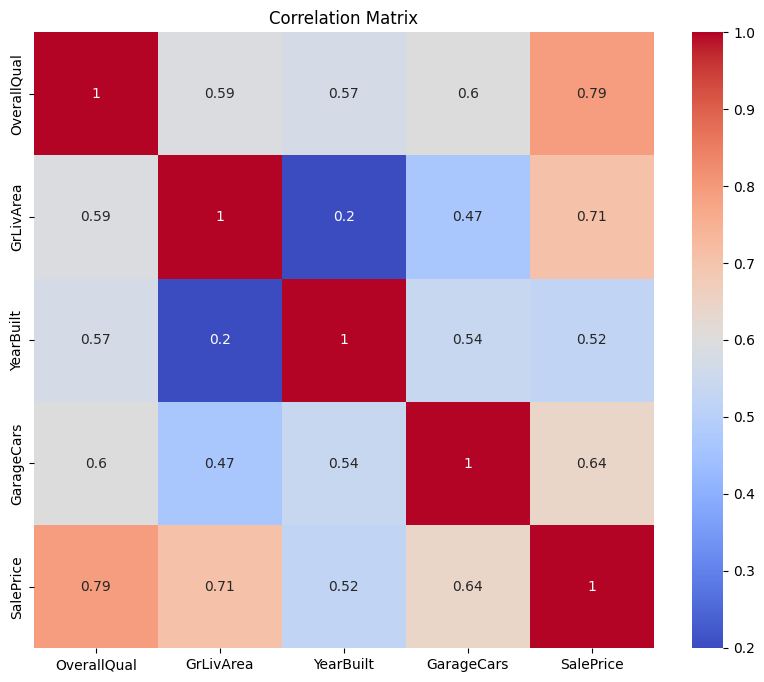

In [23]:
selected_features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars', 'SalePrice']
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

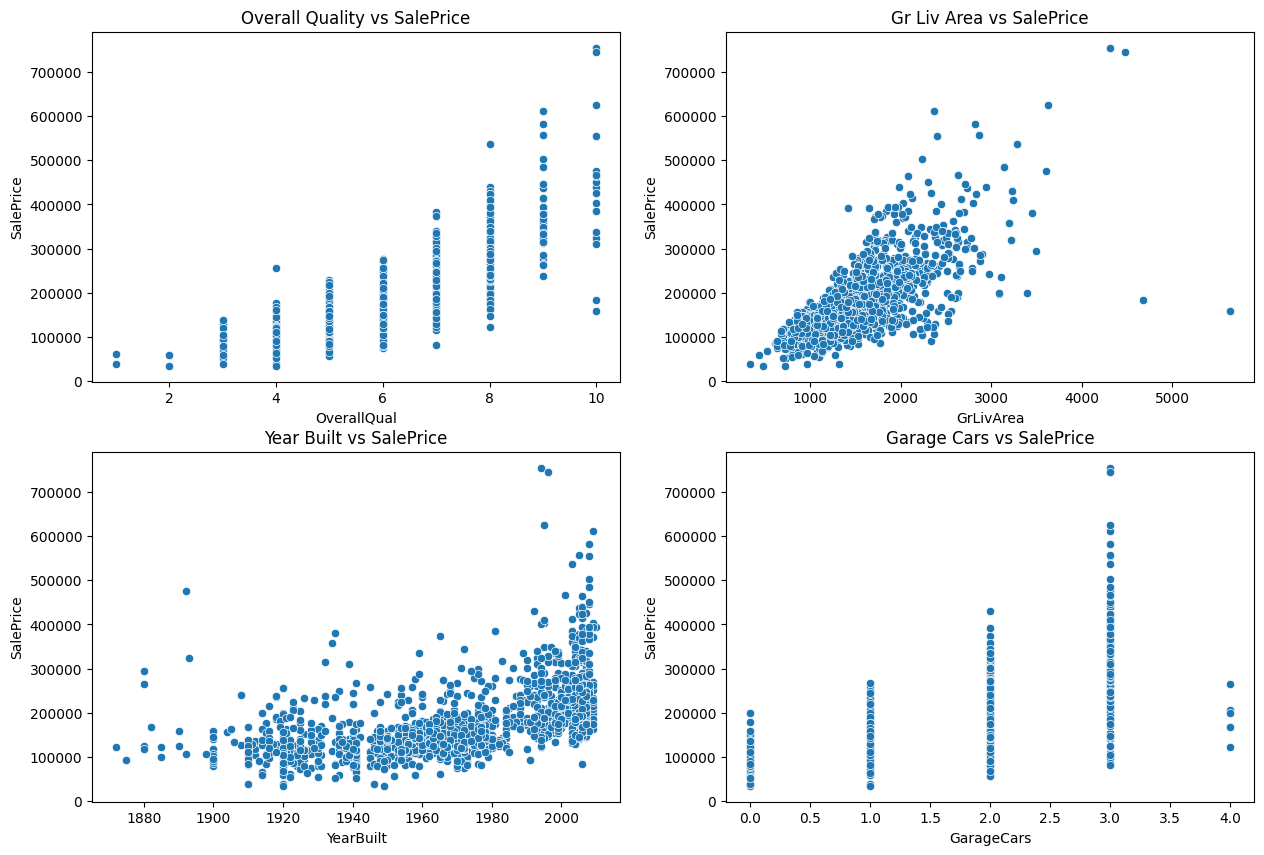

In [24]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_train)
plt.title('Overall Quality vs SalePrice')

plt.subplot(2, 2, 2)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)
plt.title('Gr Liv Area vs SalePrice')

plt.subplot(2, 2, 3)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_train)
plt.title('Year Built vs SalePrice')

plt.subplot(2, 2, 4)
sns.scatterplot(x='GarageCars', y='SalePrice', data=df_train)
plt.title('Garage Cars vs SalePrice')

plt.show()

## Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_train[['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars']]
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1807041969.6278808
R-squared: 0.7644113273911772


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])

print(feature_importances)

             Importance
OverallQual    0.595626
GrLivArea      0.256025
YearBuilt      0.098260
GarageCars     0.050088


In [27]:
 # pip install xgboost

## XGBoost

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.2,random_state=42)

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=0)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 1087822950.2905326
R^2 Score: 0.8581777461731369


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def all_reg_models(X_train,X_test,y_train,y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBoost": XGBRegressor(),
        "LightGBM": LGBMRegressor(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "KNeighborsRegressor":KNeighborsRegressor(),
        "SVR":SVR(),
        "MLPRegressor":MLPRegressor()
    }
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)  
        r2 = r2_score(y_test, predictions)
        results[name] = (mse, rmse, r2)

    for name, (mse, rmse, r2) in results.items():
        print(f"{name}: Average RMSE: {rmse:.2f}")
        print(f"{name}: R2: {r2:.2f}")

    best_model_name = min(results, key=lambda x: results[x][0])
    best_model_mse, best_model_rmse, best_model_r2 = results[best_model_name]
    print(50*"*")
    print(f"\nBest Performing Model: {best_model_name} with Average RMSE: {best_model_rmse:.2f} and R2: {best_model_r2:.2f}")

In [32]:
all_reg_models(X_train,X_test,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 4
[LightGBM] [Info] Start training from score 181441.541952
Linear Regression: Average RMSE: 42509.32
Linear Regression: R2: 0.76
Decision Tree: Average RMSE: 42643.80
Decision Tree: R2: 0.76
Random Forest: Average RMSE: 32851.88
Random Forest: R2: 0.86
Gradient Boosting: Average RMSE: 30579.65
Gradient Boosting: R2: 0.88
XGBoost: Average RMSE: 32982.16
XGBoost: R2: 0.86
LightGBM: Average RMSE: 36123.56
LightGBM: R2: 0.83
Ridge: Average RMSE: 42514.79
Ridge: R2: 0.76
Lasso: Average RMSE: 42509.49
Lasso: R2: 0.76
ElasticNet: Average RMSE: 46643.65
ElasticNet: R2: 0.72
KNeighborsRegressor: Average RMSE: 36152.64
KNeighborsRegressor: R2: 0.83
SVR:

## LightGBM

In [33]:
# pip install lightgbm

In [34]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

model_LGBM = lgb.LGBMRegressor(objective='regression', metric='mse', boosting_type='gbdt')

model_LGBM.fit(X_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model_LGBM.predict(X_test)

# Model performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 4
[LightGBM] [Info] Start training from score 181441.541952
Mean Squared Error: 1304911382.0546076
R^2 Score: 0.8298753733795701


## Best Model (Gradient Boosting)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Gradient Boosting Modeli RMSE: {rmse}')
print(f'Gradient Boosting Modeli R2: {r2}')


Gradient Boosting Modeli RMSE: 30654.46658652826
Gradient Boosting Modeli R2: 0.8774893927165603


In [37]:
df_sample=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
df_sample

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [38]:
from sklearn.impute import SimpleImputer

# Reload the full test dataset
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Select the features
X_test = df_test[['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars']]

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_test_imputed = imputer.fit_transform(X_test)

# Apply scaling 
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions
y_test_pred = gb_model.predict(X_test_scaled)

# Create the submission DataFrame
submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_test_pred
})

# Save the submission file
submission.to_csv("submission.csv", index=False)

In [39]:
submission

,Id,SalePrice
0,1461,124210.879526
1,1462,143254.292245
2,1463,178327.614694
3,1464,188349.088069
4,1465,222841.070345
...,...,...
1454,2915,100731.390696
1455,2916,115231.910343
1456,2917,144338.136539
1457,2918,127454.456248
